In [3]:
import torch
import torch.nn as nn

## ======测试Parameter及其赋值操作，lm里的tie embed with softmax weight===============

CLASS torch.nn.Parameter[SOURCE]
A kind of Tensor that is to be considered a module parameter.

Parameters are Tensor subclasses, that have a very special property when used with Module s 
- when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator.
Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model.
If there was no such class as Parameter, these temporaries would get registered too.

In [35]:
a = torch.tensor((2, 3), dtype=torch.float)

In [36]:
a

tensor([2., 3.])

In [37]:
b = a
a

tensor([2., 3.])

In [38]:
b == a

tensor([1, 1], dtype=torch.uint8)

In [39]:
b is a

True

In [40]:
pa = nn.Parameter(a)
pa

Parameter containing:
tensor([2., 3.], requires_grad=True)

In [41]:
pb = nn.Parameter(a)
pb

Parameter containing:
tensor([2., 3.], requires_grad=True)

In [27]:
pa == pb

tensor([1, 1], dtype=torch.uint8)

In [42]:
pb is pa

False

In [43]:
pa.data = pa.data + 2
pa

Parameter containing:
tensor([4., 5.], requires_grad=True)

In [44]:
pb

Parameter containing:
tensor([2., 3.], requires_grad=True)

In [45]:
pb = pa
pb

Parameter containing:
tensor([4., 5.], requires_grad=True)

In [46]:
pb is pa

True

In [47]:
pa

Parameter containing:
tensor([4., 5.], requires_grad=True)

In [48]:
pb

Parameter containing:
tensor([4., 5.], requires_grad=True)

In [49]:
pb.data += 3

In [50]:
pa

Parameter containing:
tensor([7., 8.], requires_grad=True)

In [51]:
pb

Parameter containing:
tensor([7., 8.], requires_grad=True)

### 结论：nn.Linear里的weight就是Parameter类，赋值操作相当于引用，可以用来绑定参数，并且linear weight 的shape为（out_fea, in_fea）

In [54]:
tensor = torch.tensor((), dtype=torch.float64)
tensor

tensor([], dtype=torch.float64)

In [58]:
tensor.new_zeros(2,3)#return a new tensor, not in place

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [59]:
tensor

tensor([], dtype=torch.float64)

In [68]:
l = iter(range(4))
l

In [69]:
next(l)

0

## dropout没有parameter

In [70]:
class DropoutTest(nn.Module):
    def __init__(self, p):
        super(DropoutTest, self).__init__()
        self.dropout = nn.Dropout(p)
    def forward(self, input_):
        return self.dropout(input_)

In [71]:
dp = DropoutTest(0.1)

In [73]:
list(dp.parameters())

[]

In [75]:
for i in range(0, 5, 3):
    print(i)

0
3


### 梯度剪裁torch.nn.utils.clip_grad_norm_一般采用二范式（torch.norm），具体可以看源码

### model.eval()和model.train()在之前的项目中似乎忘了做，影响点有，batchnorm和dropout，其它影响得看具体模型的相应源码，记得check

### torch.tensor()与 torch.Tenor()的区别

In [78]:
torch.LongTensor(5)

tensor([          456,           456,           860,           860,
        2023033311440])

In [79]:
torch.tensor(5)

tensor(5)

In [83]:
torch.Tensor(5)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [1]:
getattr?

### torch.narrow()

Returns a new tensor that is a narrowed version of input tensor. The dimension dim is input from start to start + length. The returned tensor and input tensor share the same underlying storage.

In [5]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x.size()

torch.Size([3, 3])

In [10]:
torch.narrow(x, 1, 1, 2)#注意， from start to start+length

tensor([[2, 3],
        [5, 6],
        [8, 9]])

In [7]:
torch.narrow(x, 0, 0, 2)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [12]:
y = torch.Tensor(5)
y

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [13]:
y.narrow(0, 0, 2)

tensor([0.0000, 0.0000])

In [18]:
x.view(-1)


tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
import os

In [26]:
print('{:8.2f}'.format(22222.1243))
print('{:8.2f}'.format(2.1243))
print('{:.2f}'.format(222.1243))

22222.12
    2.12
222.12


In [2]:
import matplotlib.pyplot as plt

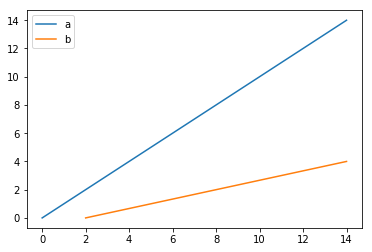

In [16]:
a = list(range(5*3))
b = list(range(5))
plt.plot(range(0, 15), a, label='a')
plt.plot(range(2, 15, 3), b, label='b')
plt.legend()
plt.savefig('test.png')